In [48]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline 

In [49]:
total_data = pickle.load(open('model_data','rb'))

X_train, X_test, y_train, y_test = train_test_split(total_data.loc[:, total_data.columns != 'Shutoff'], total_data.loc[:, 'Shutoff'], 
                                                    test_size = 0.2, random_state=22)

train_df = X_train.copy()
train_df['Shutoff'] = y_train.astype(int)
train_df['Power'] = train_df['Shutoff'].apply(lambda x: (x and 'Yes') or 'No')
train_df.head()

,Key Communities,Latitude,Longitude,Day,High,Low,Humidity,Dewpoint,Pressure,Windspeed,Windgust,Cover,Shutoff,Power
26350,Platina,40.359594,-122.894741,2019-09-17,62.46,44.03,0.63,43.62,1012.7,7.52,26.75,0.34,0,No
23209,Trinidad,41.059291,-124.143125,2019-10-19,59.14,53.37,0.88,51.69,1018.8,4.20,10.45,0.63,0,No
25955,Alton,40.545834,-124.140076,2019-09-20,67.19,52.98,0.84,54.86,1017.1,7.45,20.58,0.54,0,No
404,Alleghany,39.469231,-120.842993,2019-11-01,60.59,45.66,0.16,2.81,1022.8,4.43,11.48,0.00,1,Yes
22365,Grass Valley,39.219061,-121.061061,2019-11-16,63.11,46.98,0.74,43.57,1021.4,3.03,8.22,0.30,0,No


/Applications/miniconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/miniconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


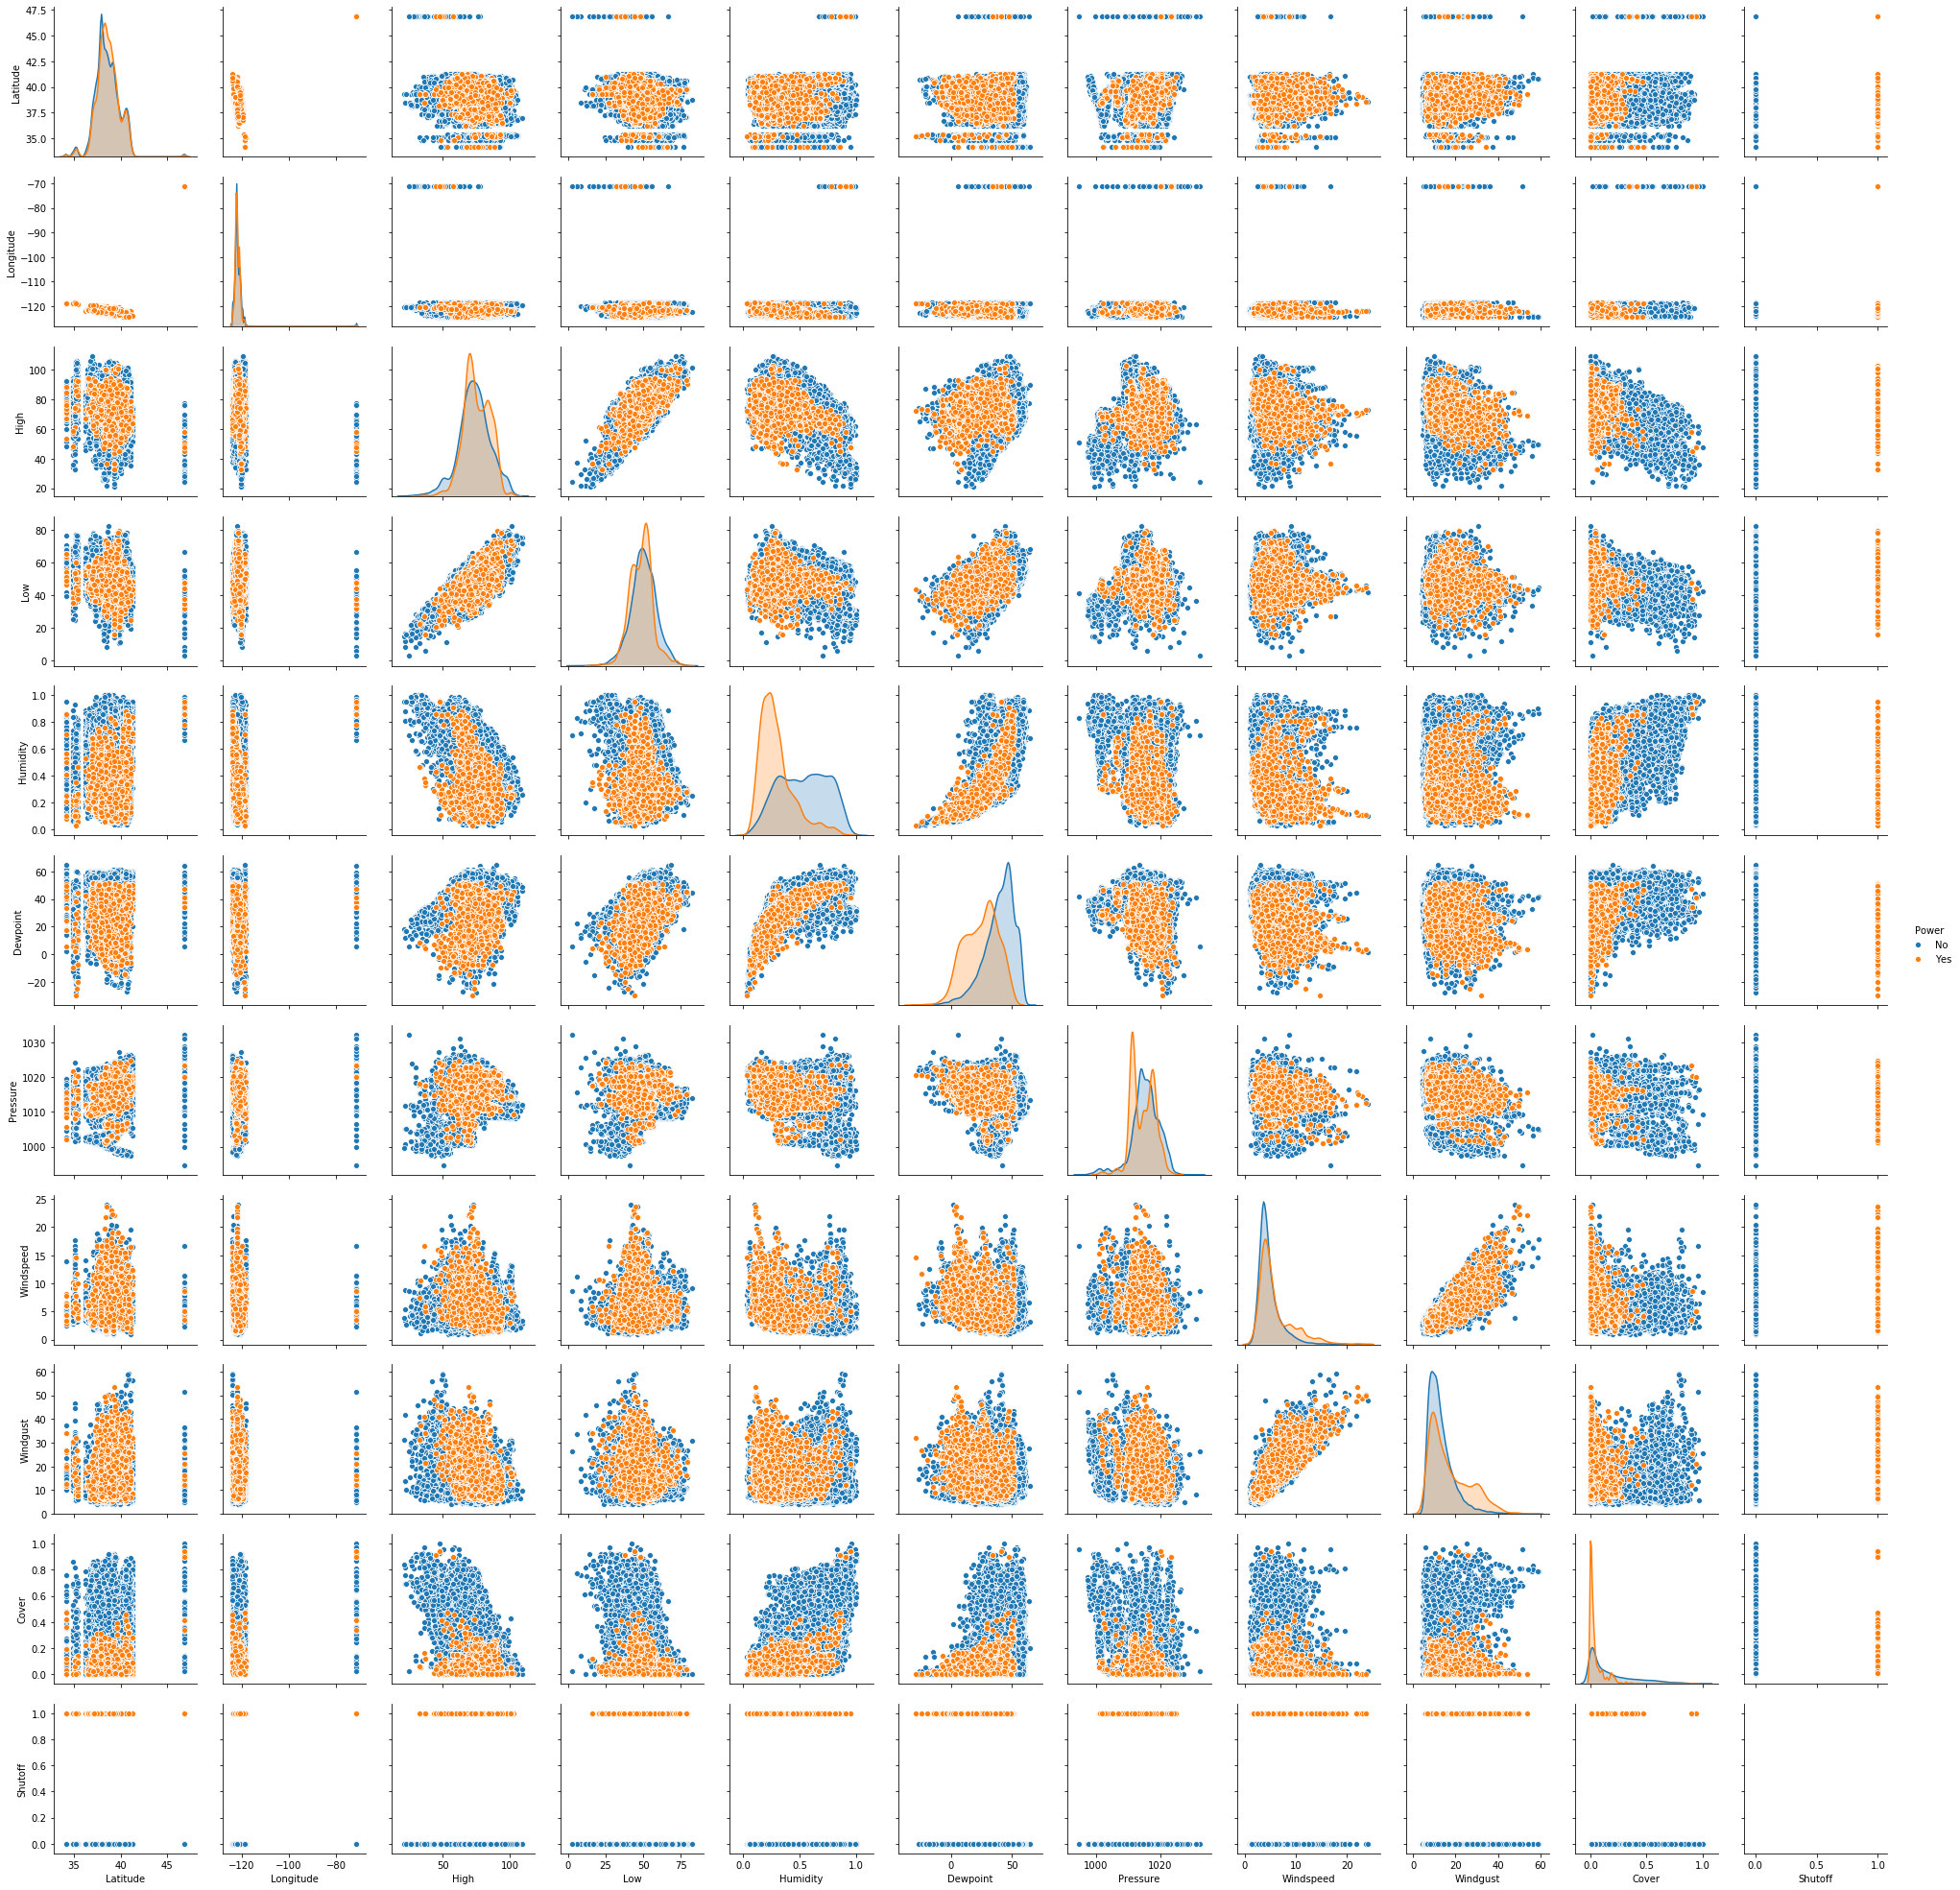

In [50]:
sns.pairplot(train_df, hue='Power');

In [51]:
#high, pressure, humidity
std_scale = StandardScaler()

X_train = train_df[['High', 'Humidity', 'Pressure']]
X_train_scaled = std_scale.fit_transform(X_train)

lr_mvp = LogisticRegression(solver='liblinear')
lr_mvp.fit(X_train, y_train)

y_predict = lr_mvp.predict(X_train)  # This is a hard classifier
lr_mvp.score(X_train, y_train)

0.8547955209347614

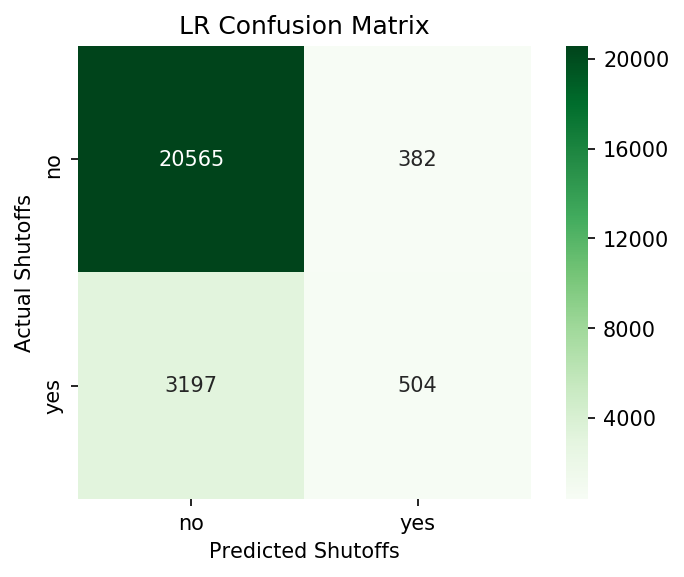

In [54]:

logit_confusion = confusion_matrix(y_train, y_predict)
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Greens, annot=True, square=True, fmt='d',
            xticklabels=['no', 'yes'],
            yticklabels=['no', 'yes'])

plt.xlabel('Predicted Shutoffs')
plt.ylabel('Actual Shutoffs')
plt.title('LR Confusion Matrix')
# logit_confusion
plt.savefig("mvp lr confusion matrix", transparent = True)

In [53]:
train_df['Power'].value_counts()

No     20947
Yes     3701
Name: Power, dtype: int64